HW2
==

Siyi Wu

sxw8121@mavs.uta.edu

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import platform
import psutil

## Insertion sort

In [2]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        flag = arr[i]
        j = i - 1
        while j >= 0 and flag < arr[j]:
            arr[j+1] = arr[j]
            j = j - 1
        arr[j+1] = flag
    return arr

## Selection sort

In [3]:
def selection_sort(arr):
    for i in range(len(arr)):
        min_index = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]
    return arr

## Bubble sort

In [4]:
def bubble_sort(arr):
  for epoch in range(len(arr)-1):
    for i in range(len(arr)-epoch-1):
      if arr[i] > arr[i+1]:
        arr[i], arr[i+1] = arr[i+1], arr[i]
  return arr

In [9]:
def benchmark_sorting_algorithms():
    sizes = [5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
    algorithms = [insertion_sort, selection_sort, bubble_sort]
    results = {alg.__name__: [] for alg in algorithms}

    for size in sizes:
        test_array = np.random.randint(0, 10000, size)
        for alg in algorithms:
            arr_copy = test_array.copy()
            start_time = time.time()
            alg(arr_copy)
            end_time = time.time()
            results[alg.__name__].append(end_time - start_time)

    # Plot results
    for alg_name, runtimes in results.items():
        plt.plot(sizes, runtimes, label=alg_name)

    plt.xlabel("Input Size (n)")
    plt.ylabel("Runtime (seconds)")
    plt.title("Sorting Algorithm Benchmark")
    plt.legend()
    plt.show()

    # System information
    print("System Information:")
    print(f"CPU: {platform.processor()}")
    print(f"RAM: {psutil.virtual_memory().total / 1e9:.2f} GB")
    print(f"Python Version: {platform.python_version()}")

    return sizes, results


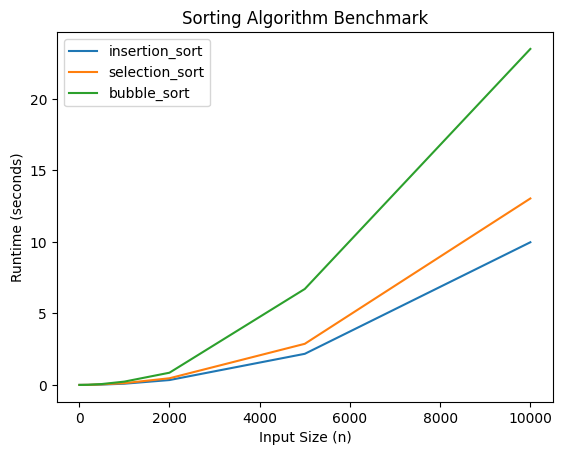

System Information:
CPU: x86_64
RAM: 13.61 GB
Python Version: 3.11.11
Runtime for insertion_sort:
  Input size 5: 0.000014 seconds
  Input size 10: 0.000015 seconds
  Input size 20: 0.000059 seconds
  Input size 50: 0.000324 seconds
  Input size 100: 0.001975 seconds
  Input size 200: 0.003494 seconds
  Input size 500: 0.024355 seconds
  Input size 1000: 0.086034 seconds
  Input size 2000: 0.340452 seconds
  Input size 5000: 2.175047 seconds
  Input size 10000: 9.975903 seconds
Runtime for selection_sort:
  Input size 5: 0.000012 seconds
  Input size 10: 0.000028 seconds
  Input size 20: 0.000091 seconds
  Input size 50: 0.000480 seconds
  Input size 100: 0.004611 seconds
  Input size 200: 0.004645 seconds
  Input size 500: 0.042262 seconds
  Input size 1000: 0.124085 seconds
  Input size 2000: 0.465625 seconds
  Input size 5000: 2.874289 seconds
  Input size 10000: 13.037144 seconds
Runtime for bubble_sort:
  Input size 5: 0.000013 seconds
  Input size 10: 0.000031 seconds
  Input siz

In [10]:
sizes, results = benchmark_sorting_algorithms()

for alg_name, runtimes in results.items():
    print(f"Runtime for {alg_name}:")
    for size, runtime in zip(sizes, runtimes):
        print(f"  Input size {size}: {runtime:.6f} seconds")